# Anime Exploratory Data Analysis and Rating Prediction System

In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [291]:
df = pd.read_csv("anime.csv", low_memory=False, parse_dates=["start_date"])

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24985 entries, 0 to 24984
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   anime_id          24985 non-null  int64         
 1   title             24985 non-null  object        
 2   type              24927 non-null  object        
 3   score             16050 non-null  float64       
 4   scored_by         24985 non-null  int64         
 5   status            24985 non-null  object        
 6   episodes          24438 non-null  float64       
 7   start_date        24110 non-null  datetime64[ns]
 8   end_date          22215 non-null  object        
 9   source            21424 non-null  object        
 10  members           24985 non-null  int64         
 11  favorites         24985 non-null  int64         
 12  episode_duration  24387 non-null  object        
 13  total_duration    24162 non-null  object        
 14  rating            2440

In [293]:
df.isna().sum()

anime_id                0
title                   0
type                   58
score                8935
scored_by               0
status                  0
episodes              547
start_date            875
end_date             2770
source               3561
members                 0
favorites               0
episode_duration      598
total_duration        823
rating                580
sfw                     0
approved                0
created_at              0
updated_at              0
start_year           4684
start_season         4684
real_start_date       875
real_end_date        2770
broadcast_day       21535
broadcast_time      21672
genres                  0
themes                  0
demographics            0
studios                 0
producers               0
licensors               0
synopsis             4493
background          22535
main_picture          154
url                     0
trailer_url         20261
title_english       14583
title_japanese         90
title_synony

In [294]:
df.head(-1).T

,0,1,2,3,4,5,6,7,8,9,...,24974,24975,24976,24977,24978,24979,24980,24981,24982,24983
anime_id,5114,11061,38524,9253,28851,32281,2904,40028,199,1575,...,55787,55789,54583,56144,54573,56169,54574,56159,56107,56168
title,Fullmetal Alchemist: Brotherhood,Hunter x Hunter (2011),Shingeki no Kyojin Season 3 Part 2,Steins;Gate,Koe no Katachi,Kimi no Na wa.,Code Geass: Hangyaku no Lelouch R2,Shingeki no Kyojin: The Final Season,Sen to Chihiro no Kamikakushi,Code Geass: Hangyaku no Lelouch,...,Koutarou in Space Wonderland,Suisou,Love Letter,Jijia Yingxiong Movie: Wo Yu Wo Dengyu Wuxian Da,Anapoko,Tettou,Seizoki,Kanshajou,Kaijuu Sekai Seifuku,Yotsukado no Melody
type,tv,tv,tv,tv,movie,movie,tv,tv,movie,tv,...,movie,movie,movie,movie,movie,music,movie,music,ona,music
score,9.1,9.04,9.05,9.07,8.94,8.84,8.91,8.8,8.78,8.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scored_by,2037075,1671587,1491491,1348232,1540277,1825476,1154270,1237778,1246643,1353753,...,7,8,7,1,9,6,10,2,2,1
status,finished_airing,finished_airing,finished_airing,finished_airing,finished_airing,finished_airing,finished_airing,finished_airing,finished_airing,finished_airing,...,finished_airing,finished_airing,finished_airing,finished_airing,finished_airing,finished_airing,finished_airing,finished_airing,currently_airing,finished_airing
episodes,64.0,148.0,10.0,24.0,1.0,1.0,25.0,16.0,1.0,25.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0
start_date,2009-04-05 00:00:00,2011-10-02 00:00:00,2019-04-29 00:00:00,2011-04-06 00:00:00,2016-09-17 00:00:00,2016-08-26 00:00:00,2008-04-06 00:00:00,2020-12-07 00:00:00,2001-07-20 00:00:00,2006-10-06 00:00:00,...,2014-01-01 00:00:00,2021-01-01 00:00:00,2009-01-01 00:00:00,2023-08-04 00:00:00,1963-01-01 00:00:00,2019-10-01 00:00:00,1964-01-01 00:00:00,1993-02-02 00:00:00,2020-04-02 00:00:00,2014-12-01 00:00:00
end_date,2010-07-04,2014-09-24,2019-07-01,2011-09-14,2016-09-17,2016-08-26,2008-09-28,2021-03-29,2001-07-20,2007-07-29,...,2014-01-01,2021-01-01,2009-01-01,2023-08-04,1963-01-01,2019-10-01,1964-01-01,1993-02-02,NaN,2014-12-01
source,manga,manga,manga,visual_novel,manga,original,original,manga,original,original,...,original,original,original,game,original,original,original,original,web_manga,original


/var/folders/r7/jw9m6vcj4j1dd60d0rkbpncm0000gn/T/ipykernel_6349/2058627047.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='viridis', ax=axes[1, 0])
/var/folders/r7/jw9m6vcj4j1dd60d0rkbpncm0000gn/T/ipykernel_6349/2058627047.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='start_season', palette='viridis', ax=axes[1, 1])


Text(0, 0.5, 'Count')

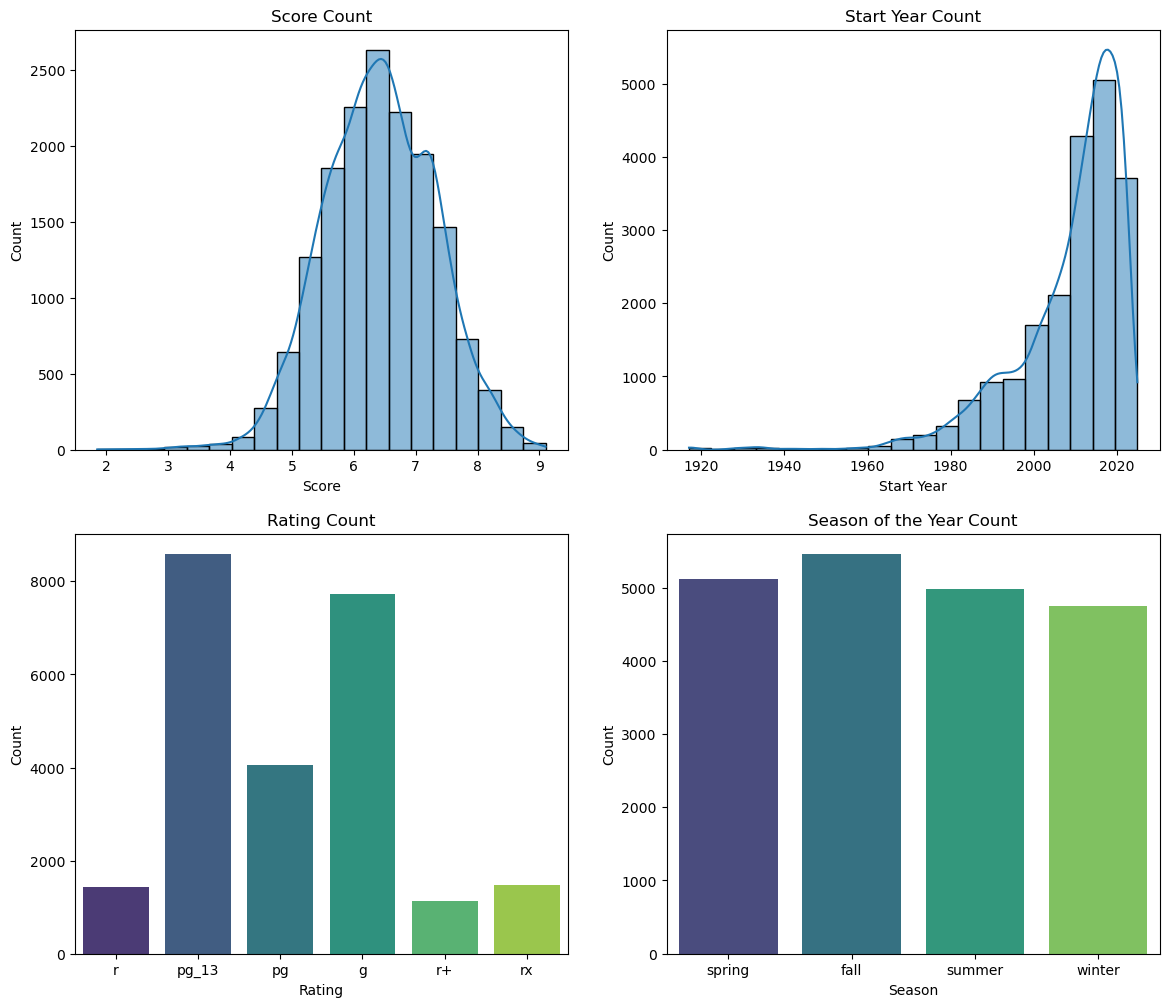

In [295]:
# Create a 2x2 subplot layout
fig, axes = plt.subplots(2,2, figsize=(14,12))

# Plot 0, 0
sns.histplot(df['score'], bins=20, ax=axes[0,0], kde=True)
axes[0, 0].set_title("Score Count")
axes[0, 0].set_xlabel("Score")
axes[0, 0].set_ylabel("Count")

# Plot 0, 1
sns.histplot(df['start_year'], bins=20, ax=axes[0,1], kde=True)
axes[0, 1].set_title("Start Year Count")
axes[0, 1].set_xlabel("Start Year")
axes[0, 1].set_ylabel("Count")

# # Plot 1, 0
sns.countplot(data=df, x='rating', palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title("Rating Count")
axes[1, 0].set_xlabel("Rating")
axes[1, 0].set_ylabel("Count")

# # Plot 1, 1
sns.countplot(data=df, x='start_season', palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title("Season of the Year Count")
axes[1, 1].set_xlabel("Season")
axes[1, 1].set_ylabel("Count")

## Fill missing values

### Fill categorical missing values first

In [296]:
# Check for columns which aren't numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

title
type
status
start_date
end_date
source
episode_duration
total_duration
rating
created_at
updated_at
start_season
real_start_date
real_end_date
broadcast_day
broadcast_time
genres
themes
demographics
studios
producers
licensors
synopsis
background
main_picture
url
trailer_url
title_english
title_japanese
title_synonyms


In [297]:
# Turn categorical variables into numbers and fill missing
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value 
        df[label + "_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df[label] = pd.Categorical(content).codes + 1

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24985 entries, 0 to 24984
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   anime_id                     24985 non-null  int64  
 1   title                        24985 non-null  int16  
 2   type                         24985 non-null  int8   
 3   score                        16050 non-null  float64
 4   scored_by                    24985 non-null  int64  
 5   status                       24985 non-null  int8   
 6   episodes                     24438 non-null  float64
 7   start_date                   24985 non-null  int16  
 8   end_date                     24985 non-null  int16  
 9   source                       24985 non-null  int8   
 10  members                      24985 non-null  int64  
 11  favorites                    24985 non-null  int64  
 12  episode_duration             24985 non-null  int16  
 13  total_duration  

In [299]:
df.isna().sum()

anime_id                        0
title                           0
type                            0
score                        8935
scored_by                       0
                             ... 
url_is_missing                  0
trailer_url_is_missing          0
title_english_is_missing        0
title_japanese_is_missing       0
title_synonyms_is_missing       0
Length: 69, dtype: int64

In [300]:
df = df.dropna(subset=['score'])

In [301]:
len(df)

16050

### Fill numerical missing values

In [302]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

anime_id
title
type
score
scored_by
status
episodes
start_date
end_date
source
members
favorites
episode_duration
total_duration
rating
sfw
approved
created_at
updated_at
start_year
start_season
real_start_date
real_end_date
broadcast_day
broadcast_time
genres
themes
demographics
studios
producers
licensors
synopsis
background
main_picture
url
trailer_url
title_english
title_japanese
title_synonyms
title_is_missing
type_is_missing
status_is_missing
start_date_is_missing
end_date_is_missing
source_is_missing
episode_duration_is_missing
total_duration_is_missing
rating_is_missing
created_at_is_missing
updated_at_is_missing
start_season_is_missing
real_start_date_is_missing
real_end_date_is_missing
broadcast_day_is_missing
broadcast_time_is_missing
genres_is_missing
themes_is_missing
demographics_is_missing
studios_is_missing
producers_is_missing
licensors_is_missing
synopsis_is_missing
background_is_missing
main_picture_is_missing
url_is_missing
trailer_url_is_missing
title_english_is_mi

In [303]:
X = df.drop("score", axis=1)
y = df["score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [304]:
# Check for which numeric columns have null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

episodes
start_year


In [305]:
# Fill numeric rows with the median
for label, content in X_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            X_train[label + "_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            X_train[label] = content.fillna(content.median())

for label, content in X_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            X_test[label + "_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            X_test[label] = content.fillna(content.median())

for label, content in y_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with median
            y_train[label] = content.fillna(content.median())

for label, content in y_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with median
            y_test[label] = content.fillna(content.median())

In [306]:
X_train.isna().sum(), X_test.isna().sum(), y_train.isna().sum(), y_test.isna().sum()

(anime_id                     0
 title                        0
 type                         0
 scored_by                    0
 status                       0
                             ..
 title_english_is_missing     0
 title_japanese_is_missing    0
 title_synonyms_is_missing    0
 episodes_is_missing          0
 start_year_is_missing        0
 Length: 70, dtype: int64,
 anime_id                     0
 title                        0
 type                         0
 scored_by                    0
 status                       0
                             ..
 title_english_is_missing     0
 title_japanese_is_missing    0
 title_synonyms_is_missing    0
 episodes_is_missing          0
 start_year_is_missing        0
 Length: 70, dtype: int64,
 0,
 0)

## Model 1: Linear Regression

In [307]:
X_lr_train = X_train[["favorites", "scored_by", "members"]]
X_lr_test = X_test[["favorites", "scored_by", "members"]]

model = LinearRegression()
model.fit(X_lr_train, y_train)
model.score(X_lr_test, y_test)

0.20503068183244

In [308]:
y_pred = model.predict(X_lr_test)

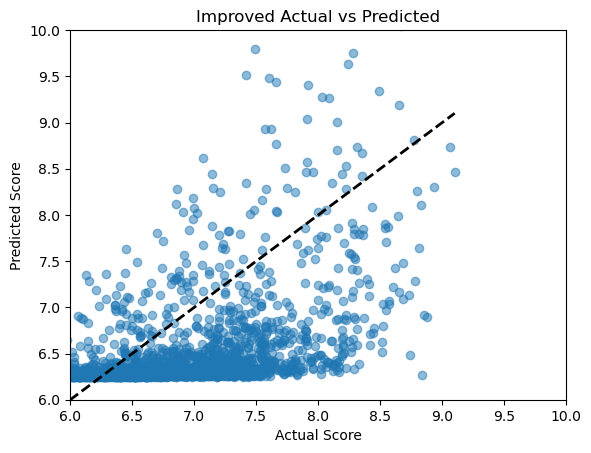

In [309]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Improved Actual vs Predicted")
plt.xlim(6, 10)
plt.ylim(6, 10)
plt.show()

## Model 2: RandomForestRegressor

In [310]:
# Instantiate model 
model = RandomForestRegressor(n_jobs=-1, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Score the model
model.score(X_test, y_test)

0.738562807134771

In [311]:
y_pred = model.predict(X_test)

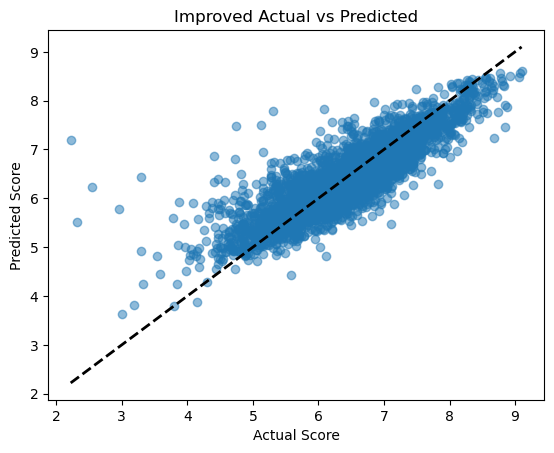

In [312]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Improved Actual vs Predicted")
plt.show()

In [313]:
model.score(X_test, y_test)

0.738562807134771

## Splitting data into training and validation sets

In [314]:
# Splitting data into train/validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [315]:
from sklearn.metrics import mean_absolute_error, r2_score

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MSE": mean_squared_error(y_train, train_preds),
              "Valid MSE": mean_squared_error(y_valid, val_preds),
              "Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

## Tuning Hyperparameters

In [316]:
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [317]:
show_scores(model)

{'Training MSE': 0.03181722574766355,
 'Valid MSE': 0.2019486399727414,
 'Training MAE': 0.1270840926791277,
 'Valid MAE': 0.3323234813084112,
 'Training R^2': 0.9608206806713818,
 'Valid R^2': 0.7396185918422893}

### Hyperparameter tuning with RandomizedSearchCV

In [320]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
            }

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                                param_distributions=rf_grid,
                                n_iter=100,
                                cv=5,
                                verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
130 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-p

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [321]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 0.5,
 'max_depth': None}

In [322]:
# Evaluate the RandomizedSearchCV model
show_scores(rs_model)

{'Training MSE': 0.0765559996202183,
 'Valid MSE': 0.2004530970557545,
 'Training MAE': 0.1886725965566106,
 'Valid MAE': 0.3300959400432092,
 'Training R^2': 0.9057299344880073,
 'Valid R^2': 0.7415468621724974}

### Train a model with the best hyperparameters

**Note:** These were found after 100 iterations of `RandomizedSearchCV`.

In [323]:
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=70,
                                    min_samples_leaf=3,
                                    min_samples_split=10,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_depth=None,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=3,
                      min_samples_split=10, n_estimators=70, n_jobs=-1,
                      random_state=42)

In [324]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MSE': 0.07655599962021829,
 'Valid MSE': 0.2004530970557545,
 'Training MAE': 0.18867259655661062,
 'Valid MAE': 0.3300959400432092,
 'Training R^2': 0.9057299344880073,
 'Valid R^2': 0.7415468621724974}

In [326]:
# Scores on rs_model (only trained on ~10,000 examples)
show_scores(rs_model)

{'Training MSE': 0.0765559996202183,
 'Valid MSE': 0.2004530970557545,
 'Training MAE': 0.18867259655661062,
 'Valid MAE': 0.3300959400432092,
 'Training R^2': 0.9057299344880073,
 'Valid R^2': 0.7415468621724974}

## Make predictions on test data

In [327]:
# Make predictions on the test data
y_preds = ideal_model.predict(X_test)

In [328]:
y_preds

array([5.87423843, 6.04887035, 5.74357834, ..., 6.97709223, 6.40778609,
       6.15456462])

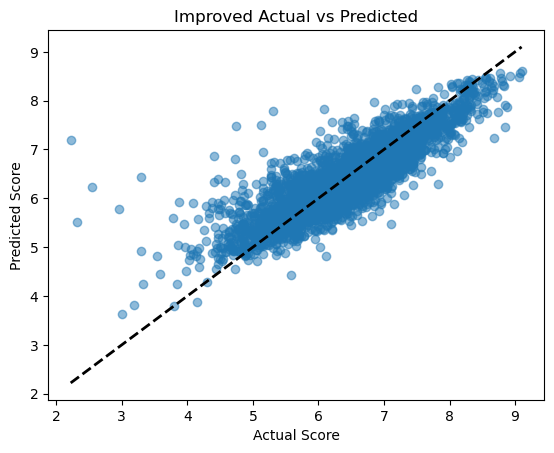

In [329]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Improved Actual vs Predicted")
plt.show()

In [331]:
model.score(X_test, y_test), ideal_model.score(X_test, y_test)

(0.734092170788229, 0.7358178553537346)